Computational Take on Statistics: Simulating Outcomes
========

What we'll be doing
-------

- Learn to use Python's `random` module
- Simulate common probablitiies

In [115]:
reset -fs

In [116]:
# Get function that chooses amoung discrete outcomes
from random import choice

In [117]:
choice?

In [118]:
# Roll a die
choice([1, 2, 3, 4, 5, 6])

2

What happenings if we want to roll a 4-sided die? 20-sided die?

In [119]:
# Traditional die: A cube
n_sides = 6
faces = list(range(1, n_sides+1)) 
choice(faces)

2

That is a lot of typing. Let's make a function:

In [120]:
from typing import List

def faces(n_sides: int) -> List[int]:
    "Enumerate the faces of a die"
    return list(range(1, n_sides+1))

In [121]:
faces?

In [122]:
# Roll a 20-sided die
choice(faces(n_sides=20))

19

What if we want to roll more than one die?

In [123]:
from random import choices

In [124]:
choices?

Let's check out the documentation for [random.choices](https://docs.python.org/3/library/random.html)

In [125]:
choices(population=faces(n_sides=6),
        k=2)

[2, 5]

What is we have weighted die?

In [154]:
rolls = choices(population=faces(n_sides=4),
        weights=[10, 5, 30, 5], 
        k=25)
print(rolls)

[3, 2, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 4, 1, 3, 3, 3, 4, 3, 3, 3]


Data Science is mostly about counting.

Let's count our outcomes

In [155]:
from collections import Counter

In [156]:
Counter(rolls)

Counter({3: 16, 2: 1, 1: 6, 4: 2})

How would we order the results?

In [157]:
rolls_counts = Counter(rolls)
# Sort by faces
sorted(rolls_counts.items(), key=lambda x: x[0]) 
 # Sort by counts
sorted(rolls_counts.items(), key=lambda x: x[1])

rolls_counts = dict(sorted(rolls_counts.items(), key=lambda x: x[0]))

Data Science is about visualization.

Python's visualization is kinda mess. It is a bazaar, not a cathedral. There are many options. Some people would say too many options.

`matplotlib` is the default. 

In [158]:
import matplotlib.pyplot as plt

%matplotlib inline

In [159]:
rolls_counts

{1: 6, 2: 1, 3: 16, 4: 2}

In [176]:
# Unpack dict
labels, values = zip(*rolls_counts.items())

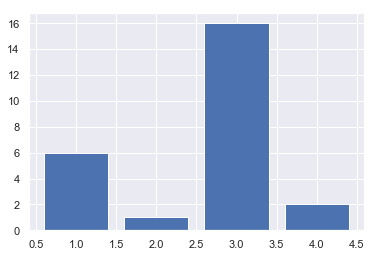

In [177]:
plt.bar(x=labels, 
        height=values);

In [179]:
# Roll 2 dice
roll_2_dice = (lambda: choices(population=list(range(1, n_sides+1)),
                      k=2))
roll_2_dice()

7

In [180]:
sum(roll_2_dice())

6

In [184]:
# TODO:  Simulate rolling a sum of seven
rolls = [sum(roll_2_dice()) for _ in range(10_0000)]

In [186]:
rolls_counts = Counter(rolls)

In [189]:
rolls_counts.most_common(n=1)

[(7, 16767)]

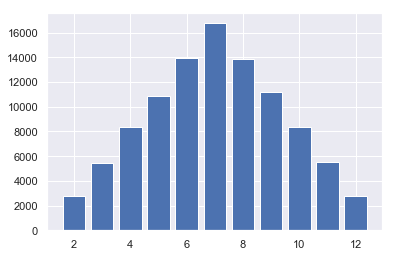

In [188]:
plt.bar(x=rolls_counts.keys(), 
        height=rolls_counts.values());

Any questions

Counting Cards with Python
------

In [191]:
# Create deck
deck = Counter(tens=16, low_cards=36)
deck

Counter({'tens': 16, 'low_cards': 36})

In [192]:
deck.elements?

In [140]:
from random import sample

In [203]:
# Deal a card, any card
sample(list(deck.elements()), k=1)

['low_cards']

In [204]:
# Sample without replacement
n_cards = 20
seen = sample(list(deck.elements()), # (without replacement) 
              k=n_cards) 
seen

['low_cards',
 'low_cards',
 'tens',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'low_cards',
 'tens',
 'low_cards',
 'low_cards',
 'tens',
 'tens',
 'low_cards',
 'low_cards']

In [205]:
# Determine the proportion of cards with a ten-value (a ten, jack, queen, or king).
seen.count('tens') / n_cards

0.2

Hit or not?

Biased coin
------

In [143]:
# Bernouli Trial
trial = (lambda: choices(population='HT', # 2 sided coin
                        cum_weights=(0.60, 1.00), # Bias - Settles on heads 60% of the time.
                        k=7) # Number of spins (not flips)
                 .count('H') >= 5) # Five Heads / Successes

In [144]:
trial()

False

In [145]:
n_trials = 100_000
sum(trial() for _ in range(n_trials)) / n_trials

0.41908

In [146]:
# Probability of the median of 5 samples being in middle two quartiles
trial = lambda: 2500 <= sorted(choices(range(10000), k=5))[2]  < 7500
sum(trial() for i in range(10000)) / 10000

0.7906

In [149]:
Source: https://docs.python.org/3/library/random.html

SyntaxError: invalid syntax (<ipython-input-149-f7e1255d6990>, line 1)

Summary
------

- 

HT: 
----

- [Python's Standard Library Examples for random module](https://docs.python.org/3/library/random.html#examples-and-recipes)
- Raymond Hettinger's _Modern Python: Big Ideas and Little Code in Python_
    - [video](https://www.amazon.com/Lesson-Implementing-k-means-Unsupervised-Learning/dp/B0782H9R1B)
    - [code](https://github.com/rhettinger/modernpython)

